# 熵，信息增益(ID3)，信息增益比（C4.5）

假设样本集合D中k类样本所占比例为$p_k(k=1,2,...,|\nu |)$，则D的信息熵定义：
$$
Ent(D) = -\sum_{k=1}^{|\nu|}p_k\ log_2\ p_k
$$
$Ent(D)$越小，纯度越高

假设属性a有$V$个可能的取值$\{a^1, a^2,...,a^V\}$，选a来对样本集D进行划分，会产生V个分支，其中，第v个分支节点包含了D中所在属性a上取值$a^v$的样本，记为$D^v$。信息增益（ID3）：
$$
Gain(D,a)=Ent(D) -\sum_{v=1}^{|V|}\frac{|D^v|}{D}Ent(D^v)
$$
明显缺点，某个属性值过多，则信息增益明显偏大。降低模型泛化能力。

C4.5算法：信息增益率
$$
Gain\_ratio(D,a) = \frac{Gain(D,a)}{IV(a)}
$$
其中：
$$
IV(a) = -\sum_{v=1}^{V}\frac{|D^v|}{D}log_2\frac{|D^v|}{D}
$$

属性值越多，则$IV(a)$越大，有效缓解了信息熵存在的问题，C4.5并不是直接选择增益率最大的属性，而是采用启发式规则：先从候选划分属性选择**增益**高于平均水平的属性，再从中选出**增益率最高**的属性。

# 基尼指数（CART分类树）

CART分类树，样本描述同上，则gini值定义：
$$
{Gini(D) =-\sum_{k=1}^{|\nu|}\sum_{k' \ne k}p_k \cdot p_{k'}\\
=1 - \sum_{k=1}^{\nu}{p_k}^2
}
$$
直观来说，$Gini(D)$反映了从数据集D中随即抽取2个两个样本，其类别标记不一致的概率。$Gini(D)$越小，说明纯度越高



基尼指数：属性a的基尼指数：
$$
Gini\_index(D,a)=\sum_{v=1}^{|V|}\frac{|D^v|}{D}Gini(D^v)
$$

选择基尼指数最大的属性。



# 最小均方误差（CART回归树）

优化目标是均方误差，划分为m个区域，每个单元输出值：$c_m$，希望每个区域内平方误差最小，那么，**$c_m$为相应单元所有样本均值时，误差最小**。

节点分类条件：
$$
\underset{js}{min}[\underset{c_1}{min}Loss(y_i,c_1) + \underset{c_2}{min}Loss(y_i,c_2)]
$$

# 剪枝

## 1. 预剪枝

a. 用信息增益/率选择属性

b. 根据测试集，对选择/不选择该属性时，准确率变化来判断是否选择这个属性进行展开



本质是贪心算法，有欠拟合的风险

## 2. 后剪枝

a. 生成一颗决策树

b. 根据测试集，从下到上去掉节点后的准确率来判断是否剪除



# 连续值与缺失值

## 连续值

连续属性a，按照样本中取值$\{a^1, a^2,...,a^n\}$,基于划分点t，将D划分为$D_{t}^{-},D_{t}^{+}$

，其中，$D_{t}^{-}$为属性a上取值不大于t的样本，$D_{t}^{+}$为取值>=t的样本。显然，在区间$[a^i, a^{i+1})$之间的任何取值所产生的分类结果相同。因此，对连续属性a，我们可以考察n-1个元素的候选划分点集合：
$$
T_a = {\frac{a^i + a^{i+1}}{2}, i<=i<=n-1}
$$

## 缺失值处理

核心：计算信息增益时，信息熵按照当前节点无缺失值样本计算，最后$Gain\_ratio = \rho * Gain\_ratio_{\widetilde{D }}$ ，其中$\widetilde{D }$为当前阶段属性a对应的无缺失值样本，而$\rho=$当前节点属性$a$无缺失样本/当前节点属性$a$所有样本，相当于将确实样本以不同概率全部移入

当前节点对应，根据父节点选择后的样本


# 决策树可视化

1. 安装graphviz：sudo apt install graphviz
2. python版本安装：pip install graphviz
3. 安装python插件pydotplus： pip install pydotplus

# 数据集介绍
iris以鸢尾花的特征作为数据来源，常用在分类操作中。\
该数据集由3种不同类型的鸢尾花的各50个样本数据构成。其中的一个种类与另外两个种类是线性可分离的，后两个种类是非线性可分离的。\
该数据集包含了4个属性：

- Sepal.Length（花萼长度），单位是cm;
- Sepal.Width（花萼宽度），单位是cm;
- Petal.Length（花瓣长度），单位是cm;
- Petal.Width（花瓣宽度），单位是cm;
种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。

In [8]:
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus 

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

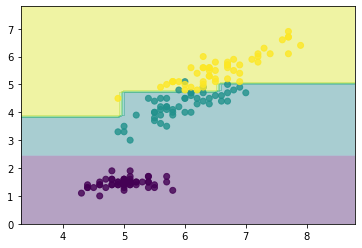

In [29]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

In [30]:
# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

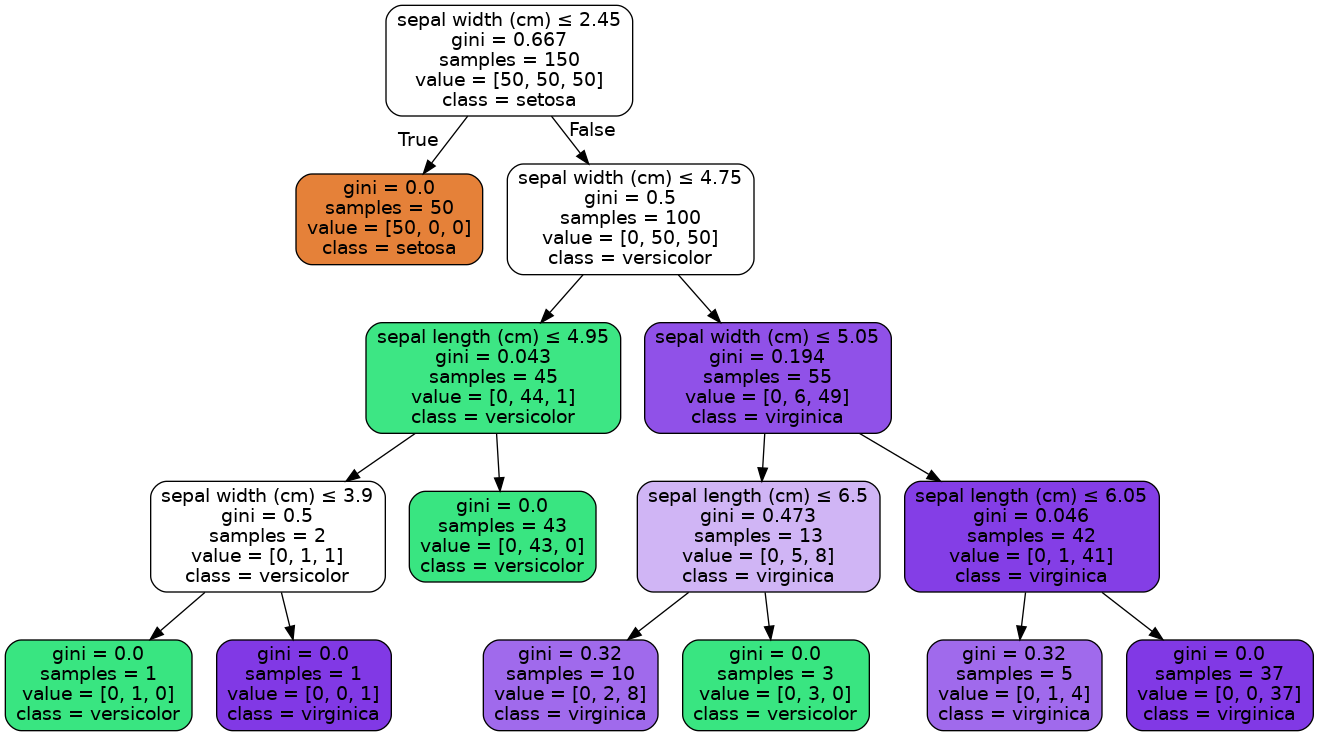

In [31]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names[0:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [32]:
# 训练模型，限制树的最大深度4:熵
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#拟合模型
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

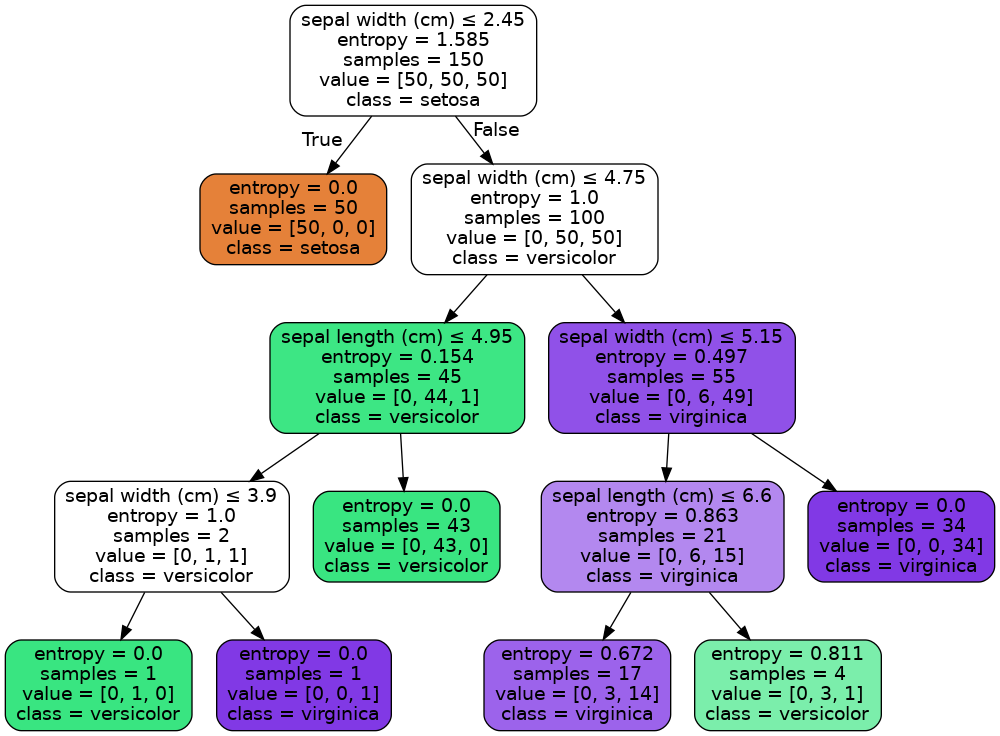

In [33]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names[0:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 